In [1]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

from datetime import datetime

import statsmodels.api as sm
import pylab as py

In [2]:
file = open('NetSense_network.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  1
The data  1  is :  2
The data  2  is :  3
The data  3  is :  4
The data  4  is :  5
The data  5  is :  6


In [3]:
data[6].nodes[75261]['hometown_1']

1

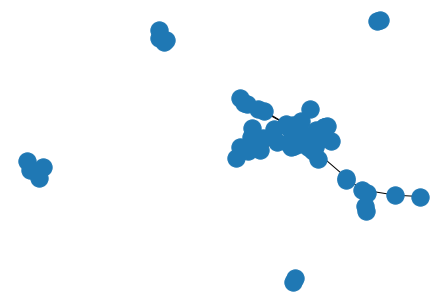

In [4]:
nx.draw(data[6])

In [5]:
data[1].nodes.data()

NodeDataView({75178: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 1, 'abortion_': 3, 'homosexual_': 3}, 30952: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 2, 'euthanasia_': 2, 'deathpen_': 2, 'gaymarriage_': 1, 'marijuana_': 3, 'political_': 1, 'abortion_': 2, 'homosexual_': 2}, 13116: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 3, 'political_': 3, 'abortion_': 3, 'homosexual_': 1}, 62555: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 1, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 3, 'abortion_': 3, 'homosexual_': 3}, 26999: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 2, 'gaymarri

In [6]:
#creating list of attributes
list_of_attributes = set([k for n in data[1].nodes for k in data[1].nodes[n].keys()])

#creating possible attribute values
attribute_values = dict((attribute, set() ) for attribute in list_of_attributes)

for sem in range(1,7):
    for node in data[sem].nodes():
        for attribute in list_of_attributes:
            attribute_values[attribute].add(data[sem].nodes[node][attribute])

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

{'abortion_': {1, 2, 3},
 'age_1': {1, 2},
 'hometown_1': {1, 2, 3},
 'premaritalsex_': {1, 2, 3},
 'gender_1': {1, 2},
 'political_': {1, 2, 3},
 'euthanasia_': {1, 2, 3},
 'marijuana_': {1, 2, 3},
 'deathpen_': {1, 2, 3},
 'homosexual_': {1, 2, 3},
 'ethnicity_1': {1, 2, 3, 4},
 'gaymarriage_': {1, 2, 3}}

In [7]:
#creating table of attribute values
attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    attributes[i] = np.zeros([len(data[i].nodes), len(list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(list_of_attributes):
            attributes[sem][i,j] = data[sem].nodes[node][attribute]

In [8]:
attributes

{1: array([[3., 1., 1., ..., 3., 2., 3.],
        [2., 1., 1., ..., 2., 2., 1.],
        [3., 1., 1., ..., 1., 2., 3.],
        ...,
        [1., 2., 1., ..., 1., 4., 1.],
        [1., 2., 3., ..., 1., 1., 2.],
        [3., 2., 1., ..., 3., 1., 3.]]),
 2: array([[1., 2., 3., ..., 1., 1., 1.],
        [1., 2., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 3., 1., 3.],
        ...,
        [1., 1., 1., ..., 3., 1., 3.],
        [1., 1., 2., ..., 3., 1., 3.],
        [2., 1., 1., ..., 3., 3., 3.]]),
 3: array([[3., 1., 2., 3., 2., 2., 3., 1., 1., 3., 1., 3.],
        [1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
        [1., 2., 2., 1., 2., 2., 1., 3., 1., 1., 1., 2.],
        [1., 1., 1., 3., 2., 3., 3., 3., 3., 3., 3., 3.],
        [3., 2., 1., 3., 1., 1., 3., 2., 1., 3., 1., 3.],
        [3., 1., 1., 1., 2., 2., 3., 1., 1., 1., 2., 3.],
        [1., 1., 2., 3., 1., 1., 2., 2., 1., 3., 1., 3.],
        [3., 2., 2., 3., 2., 3., 2., 1., 1., 3., 1., 3.],
        [1., 1., 1., 1., 1., 

In [9]:
import mca


In [10]:
df = pd.DataFrame(data=attributes[1], columns=attribute_values)
print(df)

    abortion_  age_1  hometown_1  premaritalsex_  gender_1  political_  \
0         3.0    1.0         1.0             3.0       2.0         1.0   
1         2.0    1.0         1.0             2.0       2.0         1.0   
2         3.0    1.0         1.0             3.0       1.0         3.0   
3         3.0    2.0         1.0             3.0       1.0         3.0   
4         3.0    2.0         1.0             3.0       1.0         2.0   
..        ...    ...         ...             ...       ...         ...   
93        1.0    1.0         2.0             3.0       1.0         1.0   
94        3.0    1.0         1.0             3.0       2.0         3.0   
95        1.0    2.0         1.0             3.0       1.0         2.0   
96        1.0    2.0         3.0             1.0       2.0         1.0   
97        3.0    2.0         1.0             3.0       1.0         2.0   

    euthanasia_  marijuana_  deathpen_  homosexual_  ethnicity_1  gaymarriage_  
0           3.0         2.0   

In [11]:
mca_counts = mca.MCA(df, ncols = len(attribute_values))
# print(mca_counts.fs_r(1))
print(mca_counts.L)

[0 0 0 0 0 0 0 0 0 0 0 0]


# PCA
Trying simple PCA, although it is not recommended. To do it we need to remove categorical data first. 

In [12]:

ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{'abortion_', 'political_', 'deathpen_', 'premaritalsex_', 'euthanasia_', 'marijuana_', 'homosexual_', 'gaymarriage_'}
{1: array([[3., 1., 3., 3., 3., 2., 3., 3.],
       [2., 1., 2., 2., 2., 3., 2., 1.],
       [3., 3., 3., 3., 3., 3., 1., 3.],
       [3., 3., 1., 3., 1., 2., 3., 3.],
       [3., 2., 2., 3., 1., 1., 3., 2.],
       [1., 2., 1., 1., 3., 1., 1., 1.],
       [1., 1., 2., 1., 1., 1., 2., 2.],
       [2., 2., 2., 1., 2., 3., 1., 2.],
       [3., 2., 1., 3., 3., 2., 3., 3.],
       [1., 3., 1., 3., 1., 3., 3., 3.],
       [1., 2., 1., 1., 3., 2., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 2.],
       [1., 1., 1., 3., 2., 3., 3., 3.],
       [1., 1., 1., 1., 1., 3., 2., 1.],
       [1., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 2., 3., 2., 2., 1.],
       [1., 1., 2., 3., 2., 2., 1., 1.],
       [1., 1., 3., 1., 3., 3., 1., 1.],
       [3., 3., 2., 2., 3., 3., 3., 3.],
       [1., 1., 1., 3., 3., 3., 1., 3.],
       [3., 1., 3., 3., 3., 3., 3., 3.],
       [3., 3., 

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(ord_attributes[1])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.47038187 0.11940998 0.10246659 0.08957861 0.07116288 0.06436994
 0.05160825 0.03102189]
[17.11639876  8.62397378  7.98873919  7.46946095  6.65754145  6.33182142
  5.66952482  4.39563096]


In [14]:
pca.components_

array([[-0.41745007, -0.3241474 , -0.12955624, -0.41769261, -0.24968005,
        -0.27084   , -0.48425964, -0.39901144],
       [ 0.07033197, -0.43714941,  0.65333018,  0.23690543,  0.46844261,
        -0.22128266, -0.09174305, -0.2101619 ],
       [-0.13639703,  0.10379584, -0.07401475, -0.05748098,  0.42464514,
         0.77893658, -0.28540519, -0.30548031],
       [-0.2445525 , -0.37576774, -0.52764789, -0.08070223,  0.57800543,
        -0.16178306,  0.17738585,  0.34976814],
       [ 0.67667811,  0.17894791, -0.08275739, -0.58494095,  0.29847934,
        -0.2090991 , -0.10553723, -0.13087866],
       [-0.06968337,  0.476098  , -0.31818028,  0.49896288,  0.23693772,
        -0.41560726, -0.16015638, -0.40466446],
       [ 0.41052265, -0.5095246 , -0.37499853,  0.25563998, -0.2217284 ,
         0.16193395,  0.27344745, -0.46445726],
       [ 0.33331801, -0.18315813, -0.15418497,  0.32112321, -0.09702961,
         0.04570879, -0.72978919,  0.42937486]])

# Checking correlation for PCA transformed variables

In [15]:
dcor_attributes = dict((i, 0) for i in range(1,7))

dcor_attributes = dict((j, np.array([np.sum(pca.components_*ord_attributes[j][i],1) for i in range(0,len(ord_attributes[j]))])) for j in range(1,7))

In [16]:
def get_transformed_attributes(agents, pca_comp = pca.components_):
    agents = np.array(agents)
    if not hasattr(agents,  "__len__"):
        agents = [agents]
    one_ag = False
    if hasattr(agents,  "shape"):
        if len(agents.shape) == 1:
            agents = [agents]
            one_ag = True
    
    transf = np.array([np.sum(pca.components_*agents[i],1) for i in range(0,len(agents))])
    
    if one_ag:
        transf = transf[0]
    return transf

In [17]:
get_transformed_attributes(np.ones(8))

array([-2.69263746,  0.46867315,  0.4485993 , -0.285294  ,  0.04089202,
       -0.15629314, -0.46916477, -0.03463704])

In [18]:
dcor_attributes[1].shape, 

((98, 8),)

In [19]:
spr_cor, spr_pv = stats.spearmanr(dcor_attributes[1], axis=0)

In [20]:
np.set_printoptions(precision=3)
print(spr_cor)
print(spr_pv)

[[ 1.    -0.032 -0.089  0.036 -0.048 -0.07   0.005 -0.057]
 [-0.032  1.    -0.042  0.039  0.013  0.058 -0.02  -0.021]
 [-0.089 -0.042  1.    -0.004  0.037 -0.019  0.073 -0.047]
 [ 0.036  0.039 -0.004  1.     0.042  0.033  0.022 -0.006]
 [-0.048  0.013  0.037  0.042  1.     0.115 -0.079 -0.045]
 [-0.07   0.058 -0.019  0.033  0.115  1.    -0.04  -0.003]
 [ 0.005 -0.02   0.073  0.022 -0.079 -0.04   1.     0.136]
 [-0.057 -0.021 -0.047 -0.006 -0.045 -0.003  0.136  1.   ]]
[[0.    0.751 0.385 0.727 0.636 0.491 0.959 0.577]
 [0.751 0.    0.682 0.707 0.9   0.568 0.847 0.839]
 [0.385 0.682 0.    0.967 0.717 0.852 0.472 0.645]
 [0.727 0.707 0.967 0.    0.68  0.749 0.829 0.955]
 [0.636 0.9   0.717 0.68  0.    0.26  0.441 0.659]
 [0.491 0.568 0.852 0.749 0.26  0.    0.693 0.975]
 [0.959 0.847 0.472 0.829 0.441 0.693 0.    0.183]
 [0.577 0.839 0.645 0.955 0.659 0.975 0.183 0.   ]]


Using PCA variables show that they are decorrelated. So maybe we can use them to calculate polarities, triads etc. 
But as to calc each new attribute we get all old attributes with certain coefficients, won't the distance just be sum of coefficients for given old attribute times this attribute value?

## Max difference of new attributes

In [21]:
def calc_distance(agent1, agent2, scale = 1):
    return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale

def calc_distances(agents, scale = 1):
    N, A = agents.shape
    
    distances = np.zeros([N,N])
    
    for i in range(0,N):
        for j in range(i+1,N):
            distances[i,j] = calc_distance(agents[i], agents[j], scale)
            distances[j,i] = distances[i,j]
    return distances


In [22]:
max_dif = abs(np.sum([3,3,3,3,3,3,3,3] * pca.components_[0]) - np.sum(np.ones(8) * pca.components_[0]))/8
min_dif = 0
max_dif

0.6731593640729354

In [23]:
max_difs = [(np.sum(np.ones(8)*3 * pca.components_[i]) - np.sum(np.ones(8) * pca.components_[i]))/8 for i in range(0, len(pca.components_))]
max_difs

[-0.6731593640729354,
 0.11716828740273678,
 0.11214982538572452,
 -0.07132349966753429,
 0.01022300533199887,
 -0.03907328540479936,
 -0.11729119229619525,
 -0.00865926027737491]

In [24]:
sum(np.abs(max_difs))

1.1490477198392992

In [25]:
max_difs2 = [(np.sum(np.abs(np.ones(8)*3 * pca.components_[i])) - np.sum(np.abs(np.ones(8) * pca.components_[i])))/8 for i in range(0, len(pca.components_))]
max_difs2, sum(max_difs2)

([0.6731593640729354,
  0.5973368021543238,
  0.5415389513500879,
  0.6239032129798602,
  0.5668296735029927,
  0.6450725898637424,
  0.6680632035555414,
  0.5734216963252283],
 4.889325493804712)

In [26]:
import itertools

vals = [1, 3]

max_dif3 = 0
max_vals = []

repeat = 8

# agents2 = [np.ones(repeat)]
# agents2 = get_transformed_attributes(agents2)
for agent1 in itertools.product(vals, repeat = repeat):
    tr_agent1 = get_transformed_attributes(agent1)
#     for agent2 in agents2: 
    for agent2 in itertools.product(vals, repeat = repeat):
        tr_agent2 = get_transformed_attributes(agent2)
        dif = calc_distance(tr_agent1, tr_agent2)
        
        if dif > max_dif3:
            max_dif3 = dif
            max_vals = [agent1, agent2]
max_dif3, max_vals

(1.9498109791002054, [(1, 3, 1, 3, 3, 3, 1, 3), (3, 1, 3, 1, 1, 1, 3, 1)])

In [27]:
# def calc_max_dif()

In [28]:
calc_distance(get_transformed_attributes(np.ones(8)*3), get_transformed_attributes(np.ones(8)))

1.1490477198392994

In [30]:
get_transformed_attributes(agent1), agent1, get_transformed_attributes(max_vals[0])

(array([-8.078,  1.406,  1.346, -0.856,  0.123, -0.469, -1.407, -0.104]),
 (3, 3, 3, 3, 3, 3, 3, 3),
 array([-6.015,  0.142,  2.337,  0.334, -0.854,  0.627, -2.025,  0.997]))

In [31]:
sum(pca.components_[0]*2)/8, len(get_transformed_attributes(np.ones(8)*3))

(-0.6731593640729352, 8)

(array([0.157, 0.244, 0.487, 1.19 , 2.451, 3.277, 2.226, 0.785, 0.102,
        0.009]),
 array([0.   , 0.092, 0.183, 0.275, 0.366, 0.458, 0.549, 0.641, 0.732,
        0.824, 0.915]),
 <BarContainer object of 10 artists>)

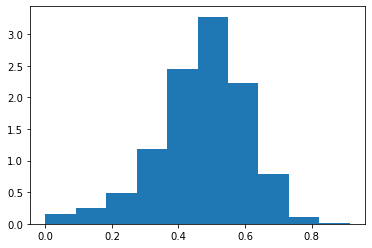

In [24]:
dists = calc_distances(dcor_attributes[1], max_dif3)

plt.hist(dists.flatten(), density=True)

In [33]:
np.where(np.max(dists) == dists), np.max(dists)

((array([53, 79, 94, 94]), array([94, 94, 53, 79])), 0.9150660566622935)

In [34]:
transf_max_vals = get_transformed_attributes(max_vals)
calc_distance(transf_max_vals[0], transf_max_vals[1])

1.9498109791002052

In [35]:
transf_max_vals, max_vals

(array([[-6.015,  0.142,  2.337,  0.334, -0.854,  0.627, -2.025,  0.997],
        [-4.755,  1.733, -0.543, -1.475,  1.018, -1.252,  0.149, -1.136]]),
 [(1, 1, 3, 3, 1, 3, 3, 3), (3, 3, 1, 1, 3, 1, 1, 1)])

In [36]:
ord_attributes[1][[53,79,94]], ord_list_of_attributes

(array([[1., 1., 3., 1., 1., 1., 1., 1.],
        [1., 1., 3., 1., 1., 1., 1., 1.],
        [3., 3., 1., 3., 3., 3., 3., 3.]]),
 {'abortion_',
  'deathpen_',
  'euthanasia_',
  'gaymarriage_',
  'homosexual_',
  'marijuana_',
  'political_',
  'premaritalsex_'})

In [37]:
(dists <= 0.5)*2-1-np.eye(dists.shape[0])

array([[ 0.,  1.,  1., ..., -1., -1.,  1.],
       [ 1.,  0., -1., ...,  1.,  1.,  1.],
       [ 1., -1.,  0., ..., -1., -1.,  1.],
       ...,
       [-1.,  1., -1., ...,  0.,  1., -1.],
       [-1.,  1., -1., ...,  1.,  0.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  0.]])

In [25]:
def calc_link_polarity2(agent1, agent2, th, attr_dif = max_dif3):
    return calc_distance(agent1, agent2, attr_dif) <= th

def calc_link_polarities2(agents, th, attr_dif = max_dif3):
    N, A = agents.shape
    
    polarities = (calc_distances(agents, attr_dif) <= th)*2 - 1 - np.eye(N)
    
    return polarities

def balanced_triad_density(polarities):
    N = polarities.shape[0]
    return (np.sum(np.matmul(polarities,polarities) * polarities) / 6 / (N*(N-1)*(N-2)/6) + 1)/2

In [26]:
polarities = calc_link_polarities2(dcor_attributes[1], 0.5)
pol2 = calc_link_polarities2(ord_attributes[1], 0.5, 2)
balanced_triad_density(polarities), balanced_triad_density(pol2)

(0.6168604039553967, 0.7293682937092363)

In [27]:
def balanced_triad_density_network(polarities, triads):
    T = len(triads)
    dens = 0.
    for triad in triads:
        i, j, k = triad
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            dens = dens + 1
    dens = dens / T
    return dens

def get_triads_polarity(polarities, triads):
    Ts = len(triads)
    
    t_pol = np.zeros(Ts) 
    t_pol_type = np.zeros(Ts)
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        pols = [polarities[i,j], polarities[i,k], polarities[k,j]]
        
        t_pol_type[t] = 3-(sum(pols)+3)/2
        
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            t_pol[t] = 1
        else:
            t_pol[t] = -1
    
    return t_pol, t_pol_type

def count_triads_types(polarities, triads):
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    
    t2 = np.array(t_pol_type)
    triads_type = [sum(t2 == i) for i in range(0,4)]
    
    return triads_type


In [28]:
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_triads_strength(triads, net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]
    Ts = len(triads)
    
    s_mul = np.zeros(Ts) #multiplicative strength
    s_add = np.zeros(Ts) #additive strength
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        s_mul[t] = A[i,j] * A[i,k] * A[j,k]
        s_add[t] = A[i,j] + A[i,k] + A[j,k]
    
    return s_mul, s_add

In [29]:
sem = 1
triads = get_triads(data[sem])

polarities = calc_link_polarities2(dcor_attributes[sem], 0.1)

balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

(0.044444444444444446, 0.012505259835893123)

In [43]:
sem = 4
triads = get_triads(data[sem])

thetas = np.linspace(0,1,101)

bals = np.zeros(len(thetas))
all_bals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    polarities = calc_link_polarities2(dcor_attributes[sem], theta)
    bals[i] = balanced_triad_density_network(polarities, triads)
    all_bals[i] = balanced_triad_density(polarities)


Text(0, 0.5, 'density of balanced triads')

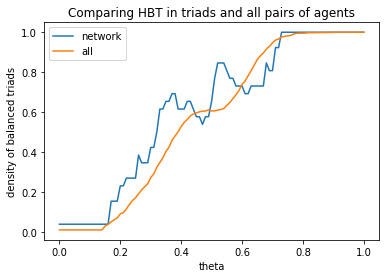

In [44]:
plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Comparing HBT in triads and all pairs of agents")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

# Randomizing triads in the whole network

In [30]:
def randomize_all_attributes(attr, randomized_agents = []):
    N, A = attr.shape
    
    if len(randomized_agents) == 0:
        randomized_agents = list(range(0,N))
    
    attr_rand = np.copy(attr)
    
    attr_copy = attr_rand[randomized_agents]
    
    np.random.shuffle(attr_copy)
    
    attr_rand[randomized_agents] = attr_copy
    
    return attr_rand

def randomize_attribute_sets(ord_attributes):
    rand_ord_attributes = dict((i, 0) for i in range(1,7))
    
    for sem in range(1,7):
        rand_ord_attributes[sem] = randomize_all_attributes(ord_attributes[sem])
    
    return rand_ord_attributes

def compare_bal_triads(triads, agents, th, attr_dif, M, randomized_agents = []):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities2(agents, th, attr_dif)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents, randomized_agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands > bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks(data, th, attr_dif, M):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = dcor_attributes[n]
        
        bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, agents, th, attr_dif, M)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

def compare_weighted_network(net, agents, th, attr_dif, M):
    polarities = calc_link_polarities2(agents, th, attr_dif)
    U_data, pval_data = compare_weighted_links(net, polarities)
    
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        U_rands[i], pval_rands[i] = compare_weighted_links(net, polarities_rand)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

def compare_weighted_networks(data, ord_attributes, th, attr_dif, M):
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    U_data, pval_data = compare_all_weighted_links(data, ord_attributes, th, attr_dif)
    
    for i in range(0,M):
        rand_ord_attributes = randomize_attribute_sets(ord_attributes)
        U_rands[i], pval_rands[i] = compare_all_weighted_links(data, rand_ord_attributes, th, attr_dif)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

In [31]:
bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, dcor_attributes[sem], 0.5, 2, 100)

In [32]:
np.sum(bal_dens_rands > bal_dens), np.mean(bal_dens_rands) - bal_dens, pval

(20, -0.059111111111111114, 20)

In [71]:
sem = 1
triads = get_triads(data[sem])

thetas = np.linspace(0,1,15)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[sem], theta, max_dif3, 100)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals[i] = pval


Text(0, 0.5, 'density of balanced triads')

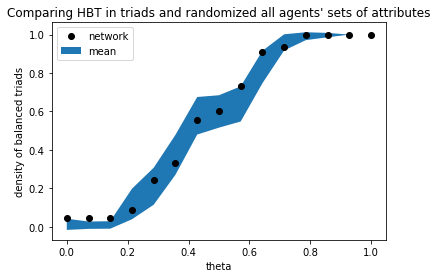

In [72]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized all agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [73]:
pvals, max_dif3

(array([ 7.,  6.,  4., 54., 34., 66., 60., 43., 16., 14., 74.,  0.,  0.,
         0.,  0.]),
 1.9498109791002056)

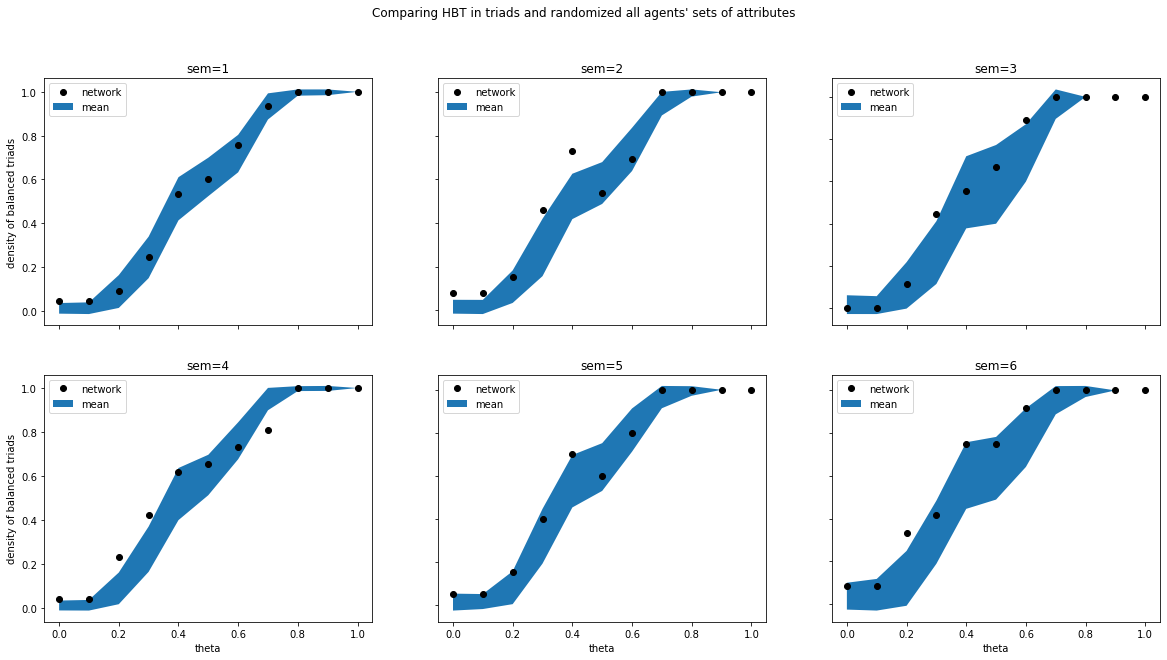

In [74]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,11)
pvals = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized all agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[semm], theta, max_dif3, 100)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [75]:
pvals

{1: array([ 8.,  8., 35., 43., 40., 49., 27., 53.,  0.,  0.,  0.]),
 2: array([ 3.,  7., 19.,  9.,  0., 60., 63.,  0.,  0.,  0.,  0.]),
 3: array([12., 10., 25.,  8., 33., 28.,  4.,  0.,  0.,  0.,  0.]),
 4: array([ 6.,  8.,  3.,  5., 18., 21., 55., 99.,  0.,  0.,  0.]),
 5: array([ 6., 10., 12., 18., 10., 55., 48.,  0.,  0.,  0.,  0.]),
 6: array([ 9., 14.,  4., 19., 10., 17., 10.,  0.,  0.,  0.,  0.])}

# Randomizing attributes only inside triads

In [76]:
sem = 1
triads = get_triads(data[sem])

In [77]:
from itertools import chain
triad_agents = np.unique(list(chain.from_iterable(triads)))
dcor_attributes[1][triad_agents];

In [78]:
sem = 2
triads = get_triads(data[sem])
triad_agents = np.unique(list(chain.from_iterable(triads)))

thetas = np.linspace(0,1,11)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals_t = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[sem], theta, max_dif3, 100, triad_agents)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals_t[i] = pval

Text(0, 0.5, 'density of balanced triads')

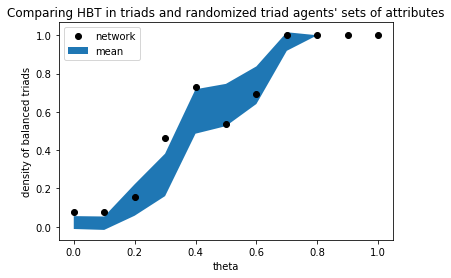

In [79]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized triad agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [80]:
pvals_t, triad_agents

(array([ 3.,  4., 32.,  3.,  9., 79., 61.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  4,  5,  8,  9, 10, 11, 14, 15, 16, 20, 21, 22, 23, 24, 25,
        26, 27, 28, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41, 44, 45, 48, 51,
        58, 66, 76]))

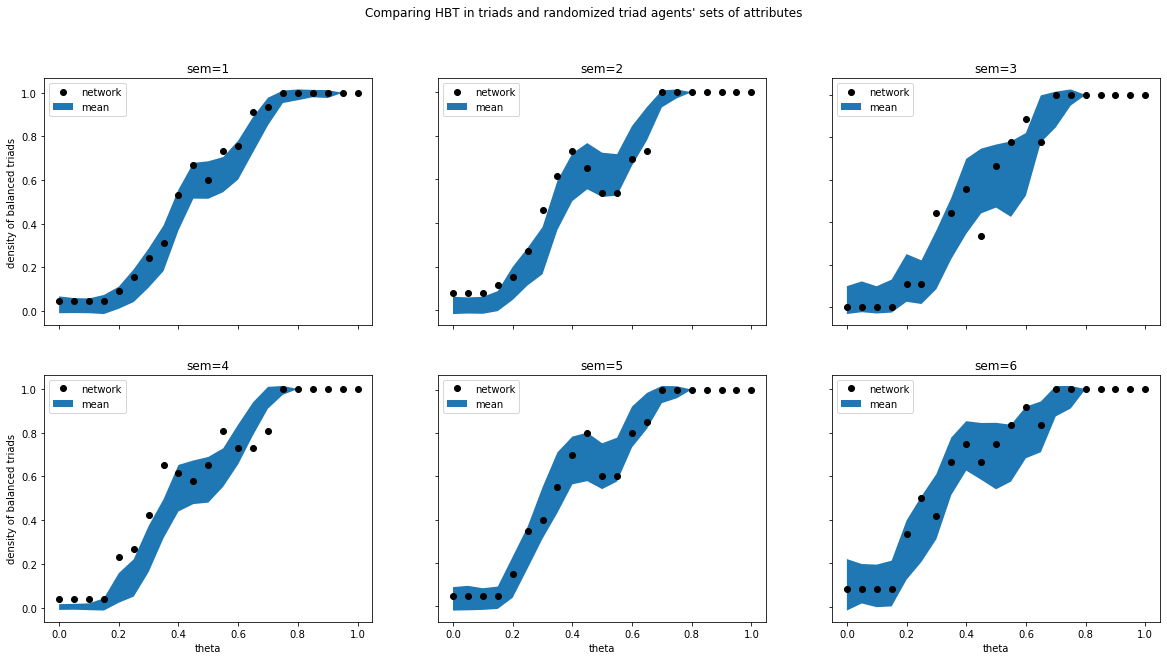

In [81]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,21)
pvals_t = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized triad agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])
        triad_agents = np.unique(list(chain.from_iterable(triads)))

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[semm], theta, max_dif3, 100, triad_agents)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals_t[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [82]:
pvals_t

{1: array([19., 16., 14., 20., 21., 21., 27., 35., 22., 16., 46.,  4., 23.,
         9., 37.,  0.,  0.,  0.,  0.,  0.,  0.]),
 2: array([ 5.,  4.,  7.,  2., 22., 17.,  3.,  6.,  9., 46., 74., 75., 64.,
        91.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 3: array([24., 35., 26., 37., 34., 30.,  4., 17., 29., 93., 25., 11.,  1.,
        73.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 4: array([ 1.,  2.,  2.,  8.,  2.,  7.,  5.,  0., 21., 36., 20.,  1., 48.,
        93., 96.,  0.,  0.,  0.,  0.,  0.,  0.]),
 5: array([18., 17., 13., 20., 32., 13., 52., 49., 30., 12., 54., 70., 56.,
        64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 6: array([31., 33., 30., 38., 19., 12., 47., 36., 33., 49., 30.,  9.,  8.,
        38.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

In [83]:
sem = 2
triads = get_triads(data[sem])
triad_agents = np.unique(list(chain.from_iterable(triads)))

In [84]:
[len(np.unique(list(chain.from_iterable(get_triads(data[sem]))))) for sem in range(1,7)]

[43, 37, 22, 41, 30, 23]

In [85]:
[len(get_triads(data[sem])) for sem in range(1,7)]

[45, 26, 9, 26, 20, 12]

# Comparing links after decorrelation

In [86]:
sem = 1
th = 0.5

polarities = calc_link_polarities2(dcor_attributes[sem], th)
pol_old = calc_link_polarities2(ord_attributes[sem], th, 2)



In [87]:
ones = np.sum(polarities == 1)/2
ones_old = np.sum(pol_old == 1)/2

ones, ones_old

(2607.0, 2933.0)

In [88]:
N = polarities.shape[0]
same = (np.sum(polarities == pol_old) - N)/2
same, same/N/(N-1)*2

(3777.0, 0.7946560067325898)

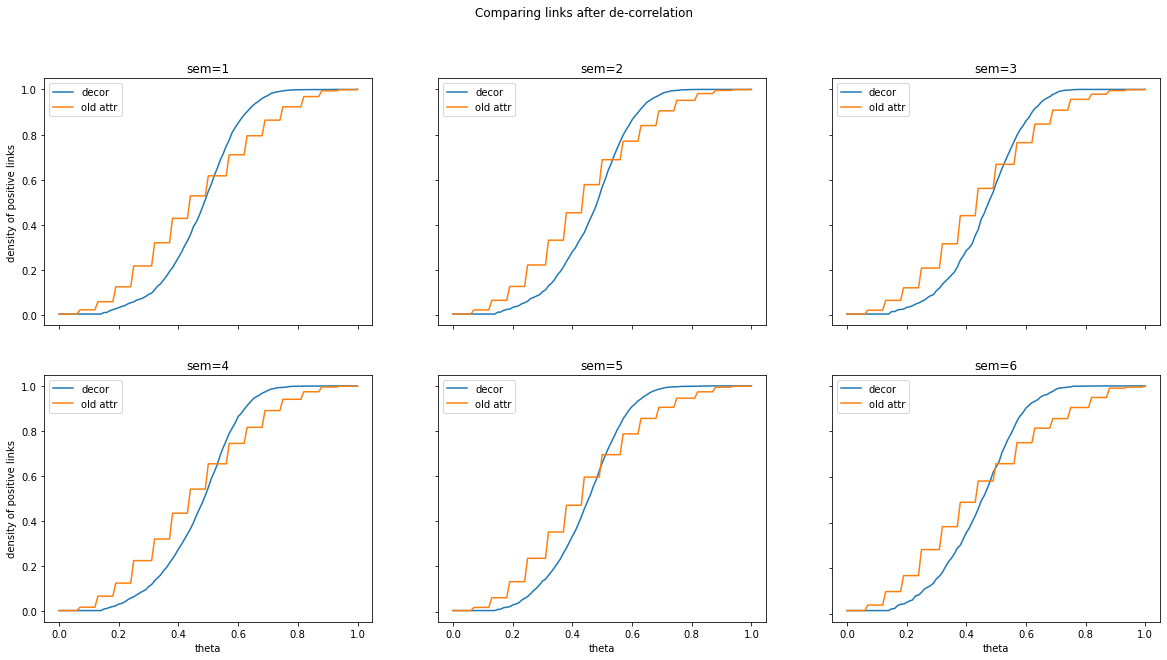

In [89]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing links after de-correlation")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        ones = np.zeros(len(thetas))
        ones_old = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            pol_old = calc_link_polarities2(ord_attributes[semm], theta, 2)
            
            N = polarities.shape[0]
            ones[i] = np.sum(polarities == 1)/2 / N/(N-1)*2
            ones_old[i] = np.sum(pol_old == 1)/2 / N/(N-1)*2
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, ones, thetas, ones_old)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["decor", "old attr"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of positive links')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

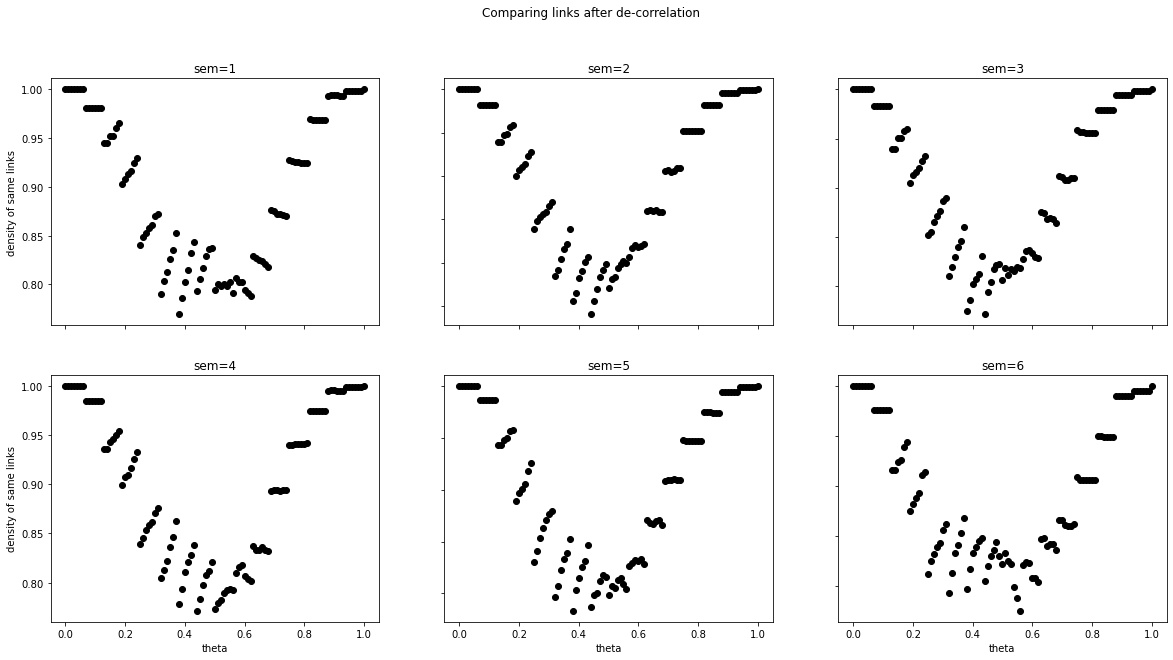

In [90]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing links after de-correlation")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        sames = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            pol_old = calc_link_polarities2(ord_attributes[semm], theta, 2)
            
            N = polarities.shape[0]
            sames[i] = (np.sum(polarities == pol_old) - N)/2 / N/(N-1)*2
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, sames, 'ko')
        # plt.plot(thetas, rand_bals_mean)

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of same links')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [91]:
data[6].degree

DegreeView({10060: 4, 85596: 10, 75261: 7, 71627: 2, 57637: 10, 66754: 6, 51552: 8, 23144: 13, 50869: 6, 25947: 6, 46160: 5, 46654: 2, 13799: 7, 86727: 4, 51722: 6, 59367: 2, 63188: 2, 68494: 6, 29914: 4, 15071: 4, 45539: 4, 46771: 5, 40997: 10, 53275: 6, 14188: 3, 17353: 2, 80058: 4, 30076: 4, 89827: 6, 37617: 2, 78911: 2, 62555: 4, 76313: 1, 50181: 1, 10841: 5, 72746: 2, 45945: 2, 26425: 2, 52067: 3, 34250: 2, 23642: 3, 66404: 6, 86352: 1, 16495: 6, 30952: 2, 19844: 1, 51597: 3, 52635: 2, 88175: 2, 75468: 2, 46021: 4, 66052: 2, 18420: 1, 68633: 2, 53884: 1, 32174: 1, 62560: 2, 25544: 5, 18344: 3, 39783: 2, 49597: 2, 44520: 2, 31583: 1})

In [92]:
A = nx.adjacency_matrix(data[6]).todense()

In [93]:
data[6].nodes

NodeView((10060, 85596, 75261, 71627, 57637, 66754, 51552, 23144, 50869, 25947, 46160, 46654, 13799, 86727, 51722, 59367, 63188, 68494, 29914, 15071, 45539, 46771, 40997, 53275, 14188, 17353, 80058, 30076, 89827, 37617, 78911, 62555, 76313, 50181, 10841, 72746, 45945, 26425, 52067, 34250, 23642, 66404, 86352, 16495, 30952, 19844, 51597, 52635, 88175, 75468, 46021, 66052, 18420, 68633, 53884, 32174, 62560, 25544, 18344, 39783, 49597, 44520, 31583))

In [94]:
degrees2 = [np.sum(A[:,i]>0) for i in range(0,len(data[6].nodes))]

In [95]:
len(degrees2), len(data[6].nodes)

(63, 63)

In [96]:
np.sort(data[6].nodes)

array([10060, 10841, 13799, 14188, 15071, 16495, 17353, 18344, 18420,
       19844, 23144, 23642, 25544, 25947, 26425, 29914, 30076, 30952,
       31583, 32174, 34250, 37617, 39783, 40997, 44520, 45539, 45945,
       46021, 46160, 46654, 46771, 49597, 50181, 50869, 51552, 51597,
       51722, 52067, 52635, 53275, 53884, 57637, 59367, 62555, 62560,
       63188, 66052, 66404, 66754, 68494, 68633, 71627, 72746, 75261,
       75468, 76313, 78911, 80058, 85596, 86352, 86727, 88175, 89827])

In [97]:
np.sum(A[0,:]>0), np.sum(A[0,:])

(2, 652)

In [98]:
list(data[6].neighbors(10060))

[51722, 85596]

In [99]:
data[6][10060]

AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}}))

In [100]:
list(data[6].neighbors(31583)), data[6][31583]

([88175], AtlasView(UnionAtlas({}, {88175: {'weight': 1}})))

What we can see above is that this is in fact a directed network! But adjacency matrix is undirected. 

I will check whether the order of nodes is good. 

In [101]:
np.sum(A[-3,:]>0), data[6][49597]

(1, AtlasView(UnionAtlas({39783: {'weight': 6}}, {39783: {'weight': 5}})))

In [102]:
nx.is_directed(data[6])

False

In [103]:
list(nx.enumerate_all_cliques(data[6]))

[[10060],
 [85596],
 [75261],
 [71627],
 [57637],
 [66754],
 [51552],
 [23144],
 [50869],
 [25947],
 [46160],
 [46654],
 [13799],
 [86727],
 [51722],
 [59367],
 [63188],
 [68494],
 [29914],
 [15071],
 [45539],
 [46771],
 [40997],
 [53275],
 [14188],
 [17353],
 [80058],
 [30076],
 [89827],
 [37617],
 [78911],
 [62555],
 [76313],
 [50181],
 [10841],
 [72746],
 [45945],
 [26425],
 [52067],
 [34250],
 [23642],
 [66404],
 [86352],
 [16495],
 [30952],
 [19844],
 [51597],
 [52635],
 [88175],
 [75468],
 [46021],
 [66052],
 [18420],
 [68633],
 [53884],
 [32174],
 [62560],
 [25544],
 [18344],
 [39783],
 [49597],
 [44520],
 [31583],
 [10060, 85596],
 [10060, 51722],
 [85596, 50869],
 [85596, 51722],
 [85596, 68494],
 [85596, 37617],
 [75261, 71627],
 [75261, 46654],
 [75261, 66404],
 [75261, 62560],
 [57637, 66754],
 [57637, 51552],
 [57637, 23144],
 [57637, 89827],
 [57637, 25544],
 [66754, 51552],
 [66754, 89827],
 [51552, 23144],
 [51552, 89827],
 [23144, 50869],
 [23144, 46160],
 [23144, 2642

In [104]:
get_triads(data[6])

[(0, 1, 14),
 (4, 5, 6),
 (4, 5, 28),
 (4, 6, 7),
 (4, 6, 28),
 (5, 6, 28),
 (7, 10, 40),
 (12, 13, 20),
 (18, 19, 21),
 (22, 23, 34),
 (23, 34, 53),
 (26, 27, 41)]

OK, the order of nodes is correct. 

Now let's check how weights in adjacency matrix are correlated with the weights in nodes' attributes

In [105]:
data[6][10060], A[0,:]

(AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}})),
 matrix([[  0, 638,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]]))

Adjacency matrix is symmetric. 

However, the weights are neither the maximum nor minimum weight of a weight i->j and j->i. 
Above is the example it is not the maximum (638, 844 -> 638). 
Also (14, 1 -> 14)


In [106]:
data[6][57637], A[4,:]

(AtlasView(UnionAtlas({66754: {'weight': 123}, 51552: {'weight': 19}, 23144: {'weight': 86}, 89827: {'weight': 6}, 25544: {'weight': 6}}, {23144: {'weight': 72}, 66754: {'weight': 106}, 51552: {'weight': 13}, 89827: {'weight': 2}, 25544: {'weight': 8}})),
 matrix([[  0,   0,   0,   0,   0, 123,  19,  86,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0]]))

It seems, that which value of weight is given is related to which node was entered first. 

In [107]:
data_nodes = list(data[6].nodes)
data[6][data_nodes[0]][85596], data[6][data_nodes[0]]

({'weight': 638},
 AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}})))

In [108]:
data[6][data_nodes[0]][85596]['weight']

638

In [109]:
def create_directed_adj_mat(net):
    A_undir = nx.adjacency_matrix(net).todense()
    A_dir = np.zeros(A_undir.shape, dtype=int)
    
    data_nodes = list(net.nodes)
    
    for node_ind, node in enumerate(data_nodes):
        for neigh in net[data_nodes[node_ind]]:
            try:
                neigh_ind = np.where(np.array(data_nodes) == neigh)[0][0]
            except KeyError:
                print(neigh)
                print(np.array(data_nodes) == neigh)
                print(data_nodes)
                print(net[data_nodes[node_ind]])
            try:
                A_dir[node_ind,neigh_ind] = net[data_nodes[node_ind]][neigh]['weight']
            except KeyError:
                print(node_ind, neigh_ind)
                print(net[data_nodes[node_ind]])
                print(net[data_nodes[node_ind]][neigh_ind])
                print(net[data_nodes[node_ind]][neigh_ind]['weight'])
    return A_dir, A_undir

"""
This can find also directed triads. 
"""
def get_triads_from_adj_mat(A):
    N = A.shape[0]
    
    triads = dict()
    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] == 0:
                continue
            for k in range(j+1,N):
                if A[j,k] > 0 and A[k,i] > 0:
                    triads[(i,j,k)] = (A[i,j], A[j,k], A[k, i])
    
    for i in range(0,N):
        for j in range(i+1,N):
            if A[j,i] == 0:
                continue
            for k in range(j+1,N):
                if A[k,j] > 0 and A[i,k] > 0:
                    triads[(k,j,i)] = (A[k,j], A[j,i], A[i,k])
    return triads

def find_th_polarity_change(attr, agent1, agent2, sem, dif_max = max_dif3):
    thresholds = np.linspace(0,1,101)
    
    beg_polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], 0, dif_max)
    
    for th in thresholds:
        polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], th, dif_max)
        if beg_polarity != polarity:
            break
        
    return th
    

In [110]:
A_dir, A_undir = create_directed_adj_mat(data[6])

In [111]:
triads = get_triads_from_adj_mat(A_dir)
triads

{(0, 1, 14): (638, 123, 16),
 (4, 5, 6): (123, 13, 13),
 (4, 5, 28): (123, 39, 2),
 (4, 6, 7): (19, 9, 72),
 (4, 6, 28): (19, 4, 2),
 (5, 6, 28): (13, 4, 25),
 (7, 10, 40): (1, 25, 1),
 (12, 13, 20): (16, 329, 7784),
 (18, 19, 21): (10, 2, 27),
 (22, 23, 34): (37, 18, 1),
 (23, 34, 53): (18, 4, 2),
 (26, 27, 41): (2, 115, 8),
 (14, 1, 0): (98, 844, 14),
 (6, 5, 4): (11, 106, 19),
 (28, 5, 4): (25, 106, 6),
 (7, 6, 4): (11, 13, 86),
 (28, 6, 4): (5, 13, 6),
 (28, 6, 5): (5, 11, 39),
 (40, 10, 7): (33, 1, 1),
 (20, 13, 12): (329, 10, 8604),
 (21, 19, 18): (7, 7, 21),
 (34, 23, 22): (10, 36, 1),
 (53, 34, 23): (4, 10, 2),
 (41, 27, 26): (101, 2, 6)}

In [112]:
sem = 6
th = 0.4

polarities = calc_link_polarities2(dcor_attributes[sem], th)
pol_old = calc_link_polarities2(ord_attributes[sem], th, 2)

In [113]:
polarities[12,13]

1.0

In [114]:
agent1 = 7
agent2 = 40
agent3 = 10
find_th_polarity_change(dcor_attributes, agent1, agent2, sem), find_th_polarity_change(ord_attributes, agent1, agent2, sem, 2)

(0.46, 0.25)

In [115]:
sem = 6
attr = dcor_attributes
agent1 = 40
agent2= 10
beg_polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], 0)
thresholds = np.linspace(0,1,101)
for th in thresholds:
    polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], th)
    if beg_polarity != polarity:
        print(th)
        break

0.56


In [116]:
dcor_attributes[sem][agent1], dcor_attributes[sem][agent2]

(array([-2.952,  1.775,  0.301, -1.341, -0.125, -0.793, -1.219, -0.343]),
 array([-4.032, -0.394,  1.396,  0.091, -0.639, -1.797, -1.074,  0.916]))

In [117]:
agent1 = 7
agent2 = 40
agent3 = 10
calc_distance(dcor_attributes[sem][agent1], dcor_attributes[sem][agent2], max_dif3), calc_distance(dcor_attributes[sem][agent1], dcor_attributes[sem][agent3], max_dif3),  calc_distance(dcor_attributes[sem][agent3], dcor_attributes[sem][agent2], max_dif3)

(0.451012365262551, 0.5163075877959855, 0.5576475905238086)

Czemu losujemy tylko po agentach, którzy tworzą triady? Czy to ma sens?

Agenci, którzy nie tworzą triad, może mają połączenia z innymi agentami, ale ich nie widzimy. Stąd jest sens ich nie brać. 

Ale jaki sens ma, że bierzemy jedną triadę ABC i triadę DEF, które są oderwane od reszty sieci i mieszamy agentów? 

Wychodzi, że atrybuty nie mają takiego znaczenia, jeśli chodzi o otrzymanie odpowiedniej równowagi. Ewentualnie, ja źle na nie patrzę. 

# E8

In [46]:
sem = 1
th = 0.4

polarities = calc_link_polarities2(dcor_attributes[sem], th)
N = polarities.shape[0]

rho = np.sum(polarities == 1)/2 / N/(N-1)*2

prob_balanced = np.power(rho,3) + 3*rho*np.power(1-rho,2)

triads = get_triads(data[sem])
balanced_triad_density_network(polarities, triads), prob_balanced

(0.5333333333333333, 0.4414758070970508)

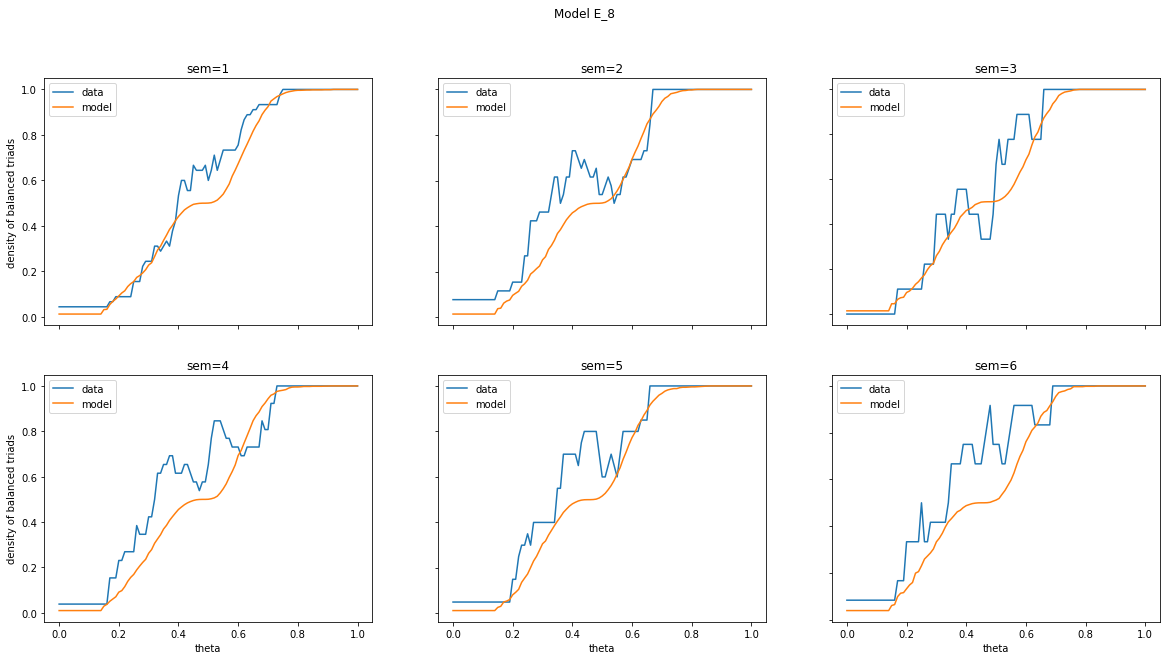

In [126]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Model E_8")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        prob_bals = np.zeros(len(thetas))
        bals = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            
            N = polarities.shape[0]
            rho = np.sum(polarities == 1)/2 / N/(N-1)*2
            prob_bals[i] = np.power(rho,3) + 3*rho*np.power(1-rho,2)
            
            triads = get_triads(data[semm])
            bals[i] = balanced_triad_density_network(polarities, triads)
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, thetas, prob_bals)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["data", "model"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Analiza statystyczna powyższego

In [34]:
def distribute_random_polarities(N, rho):
    polarities = np.zeros([N,N], dtype = int)
    
    for i in range(0,N):
        for j in range(i+1, N):
            polarities[i,j] = 1 if np.random.random() < rho else -1
            polarities[j,i] = polarities[i,j]
    return polarities

def calc_pval_E8(triads, agents, th, attr_dif, M):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities2(agents, th, attr_dif)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
    N = polarities.shape[0]
    rho = np.sum(polarities == 1)/2 / N/(N-1)*2
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        polarities_rand = distribute_random_polarities(N, rho)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands > bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks2(fun, data, th, attr_dif, M):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = dcor_attributes[n]
        
        bal_dens_rands, bal_dens, pval = fun(triads, agents, th, attr_dif, M)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

In [182]:
sem = 1
th = 0.55

polarities = calc_link_polarities2(dcor_attributes[sem], th)
N = polarities.shape[0]

rho = np.sum(polarities == 1)/2 / N/(N-1)*2
pol_rand = distribute_random_polarities(N, rho)

triads = get_triads(data[sem])
balanced_triad_density_network(polarities, triads), balanced_triad_density_network(pol_rand, triads)



(0.7333333333333333, 0.5333333333333333)

In [183]:
M = 100
calc_pval_E8(triads, dcor_attributes[sem], th, max_dif3, M)

(array([0.511, 0.578, 0.511, 0.6  , 0.444, 0.756, 0.556, 0.511, 0.6  ,
        0.511, 0.667, 0.511, 0.644, 0.489, 0.556, 0.533, 0.533, 0.622,
        0.489, 0.556, 0.556, 0.489, 0.533, 0.556, 0.6  , 0.644, 0.444,
        0.689, 0.622, 0.644, 0.533, 0.533, 0.467, 0.578, 0.578, 0.467,
        0.556, 0.578, 0.533, 0.533, 0.422, 0.578, 0.644, 0.556, 0.578,
        0.644, 0.489, 0.511, 0.511, 0.422, 0.556, 0.333, 0.467, 0.489,
        0.467, 0.622, 0.578, 0.556, 0.422, 0.511, 0.467, 0.578, 0.533,
        0.556, 0.489, 0.667, 0.533, 0.556, 0.578, 0.556, 0.578, 0.489,
        0.6  , 0.444, 0.578, 0.444, 0.6  , 0.511, 0.578, 0.533, 0.622,
        0.622, 0.622, 0.511, 0.489, 0.533, 0.489, 0.467, 0.578, 0.444,
        0.511, 0.622, 0.644, 0.689, 0.578, 0.622, 0.556, 0.578, 0.467,
        0.467]),
 0.7333333333333333,
 1)

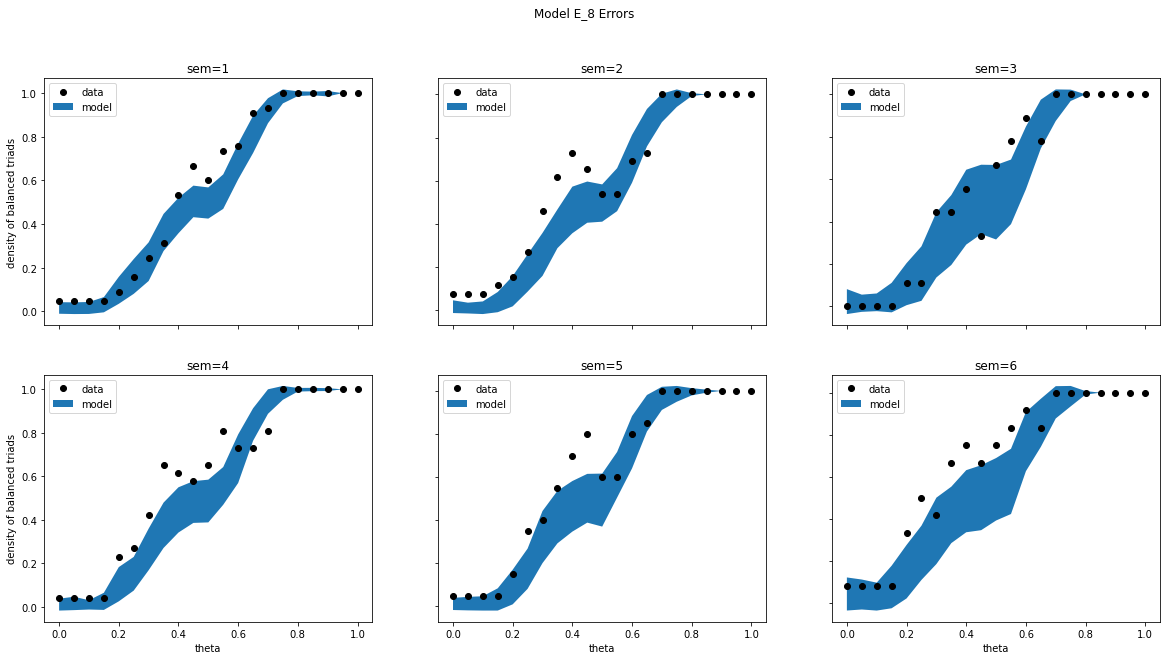

In [188]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,21)
M = 100

pvals = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Model E_8 Errors")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        prob_bals_mean = np.zeros(len(thetas))
        prob_bals_std = np.zeros(len(thetas))
        bals = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            triads = get_triads(data[semm])
            bal_dens_rands, bal_dens, pval = calc_pval_E8(triads, dcor_attributes[semm], theta, max_dif3, M)
            
            prob_bals_mean[i] = np.mean(bal_dens_rands)
            prob_bals_std[i] = np.std(bal_dens_rands)
            pvals[semm][i] = pval
            
            bals[i] = bal_dens
        
        axs[a1, a2].set_title("sem=" + str(semm))
        # axs[a1,a2].plot(thetas, bals, thetas, prob_bals)
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, prob_bals_mean-prob_bals_std, prob_bals_mean+prob_bals_std)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["data", "model"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [185]:
calc_pval_E8(triads, dcor_attributes[semm], 0.05, max_dif3, M)

(array([0.083, 0.   , 0.167, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.083, 0.083, 0.083, 0.   , 0.083, 0.   , 0.167, 0.   , 0.   ,
        0.   , 0.333, 0.   , 0.   , 0.   , 0.   , 0.083, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.083, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.083, 0.   ,
        0.   , 0.167, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.083, 0.   , 0.083,
        0.   , 0.083, 0.   , 0.167, 0.083, 0.083, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.083, 0.   , 0.   , 0.   , 0.   , 0.167,
        0.   , 0.   , 0.   , 0.25 , 0.   , 0.083, 0.083, 0.   , 0.083,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.083, 0.   ,
        0.   ]),
 0.08333333333333333,
 7)

In [193]:
sem = 6
th = 0.05

polarities = calc_link_polarities2(dcor_attributes[sem], th)
N = polarities.shape[0]

rho = np.sum(polarities == 1)/2 / N/(N-1)*2
pol_rand = distribute_random_polarities(N, rho)

triads = get_triads(data[sem])
balanced_triad_density_network(polarities, triads), balanced_triad_density_network(pol_rand, triads)



(0.08333333333333333, 0.16666666666666666)

In [194]:
pvals

{1: array([10.,  9., 12., 22., 41., 45., 39., 64., 12.,  0.,  4.,  1., 17.,
         8., 40.,  0.,  0.,  0.,  0.,  0.,  0.]),
 2: array([ 2.,  3.,  3.,  4., 10., 10.,  2.,  0.,  1.,  6., 23., 50., 45.,
        83.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 3: array([15., 12., 17., 29., 22., 43., 10., 24., 19., 75., 10.,  4.,  2.,
        59.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 4: array([ 9.,  9.,  5., 16.,  5.,  5.,  4.,  0.,  4., 12.,  4.,  0., 30.,
        87., 97.,  0.,  0.,  0.,  0.,  0.,  0.]),
 5: array([ 5.,  8.,  8., 21., 16.,  2., 20., 11.,  0.,  0., 13., 46., 30.,
        61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 6: array([14., 11.,  6., 25.,  6.,  0., 24.,  1.,  1.,  6.,  4.,  2.,  6.,
        50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

## Similar analysis but with taking all terms together

Text(0, 0.5, 'density of balanced triads')

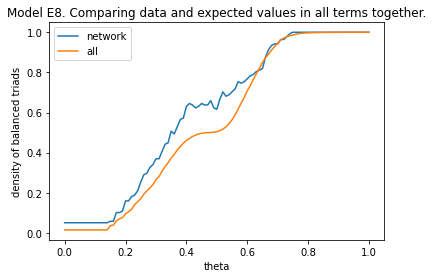

In [198]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

agents_len = [len(dcor_attributes[semm]) for semm in range(1,last_sem+1)]
net_all_num = np.sum([N*(N-1)/2 for N in agents_len[first_sem-1:last_sem]])

all_bals = np.zeros(len(thetas))
bals = np.zeros(len(thetas))

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    N = agents_len[semm-1]
            
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(dcor_attributes[semm], theta)
        bals[i] = bals[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        rho = np.sum(polarities == 1)/2 / N/(N-1)*2
        all_bals[i] = all_bals[i] + (np.power(rho,3) + 3*rho*np.power(1-rho,2) ) * N*(N-1)/2

bals = bals / triads_all_num
all_bals = all_bals / net_all_num

plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Model E8. Comparing data and expected values in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [51]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)
M = 600
disp_every = 0.2
generate_true_densities = True
saved = False

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Started analysis")

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len)

agents_len = [len(dcor_attributes[semm]) for semm in range(1,last_sem+1)]

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
# attr_rands_M = [randomize_attribute_sets(dcor_attributes) for i in range(0,M)] 

rhos = np.zeros([last_sem - first_sem + 1, len(thetas)])

if generate_true_densities:
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]

        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]

            N = polarities.shape[0]
            rhos[semm-first_sem, i] = np.sum(polarities == 1)/2 / N/(N-1)*2
    
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(current_time, ". Finished calculating real-world balanced densities. ")


bal_dens_rands = np.zeros([M, len(thetas)])
disp_every_printer = disp_every
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        N = agents_len[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = distribute_random_polarities(N, rhos[semm - first_sem, i])
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
    if (j+1) / M >= disp_every_printer:
        now = datetime.now()

        current_time = now.strftime("%H:%M:%S")
        print(current_time, ". Finished ", str(int((j+1)/M*100)), "% of randomized calculations.")
        disp_every_printer += disp_every
    
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print(current_time, ". Finished.")

bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

test_E8_all_agents_terms_together_thetas = thetas
test_E8_all_agents_terms_together_bal_dens = bal_dens
test_E8_all_agents_terms_together_bal_dens_rands = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


12:05:52 . Started analysis
12:06:04 . Finished calculating real-world balanced densities. 
12:08:38 . Finished  20 % of randomized calculations.
12:11:07 . Finished  40 % of randomized calculations.
12:13:41 . Finished  60 % of randomized calculations.
12:16:11 . Finished  80 % of randomized calculations.
12:18:45 . Finished  100 % of randomized calculations.
12:18:45 . Finished.


(8415.0,
 array([7648., 7667., 7588., 7639., 7661., 7611., 7676., 7621., 7637.,
        7614., 7603., 7532., 7668., 7557., 7609., 7557., 7628., 7662.,
        7655., 7708., 7593., 7698., 7592., 7624., 7533., 7565., 7597.,
        7667., 7615., 7641., 7622., 7589., 7596., 7711., 7620., 7668.,
        7750., 7605., 7675., 7622., 7587., 7658., 7562., 7601., 7673.,
        7646., 7629., 7643., 7620., 7703., 7625., 7511., 7613., 7667.,
        7630., 7595., 7708., 7672., 7622., 7664., 7592., 7564., 7647.,
        7656., 7635., 7645., 7589., 7537., 7630., 7682., 7605., 7604.,
        7591., 7609., 7600., 7748., 7721., 7639., 7673., 7610., 7570.,
        7593., 7567., 7556., 7645., 7638., 7602., 7559., 7625., 7566.,
        7632., 7634., 7683., 7665., 7622., 7684., 7554., 7627., 7621.,
        7631., 7658., 7621., 7536., 7655., 7634., 7594., 7616., 7653.,
        7589., 7660., 7687., 7566., 7565., 7744., 7614., 7643., 7634.,
        7655., 7586., 7608., 7642., 7566., 7654., 7662., 7590., 7668

In [52]:
#open, add and save
if not saved:
    with open('pca_e8_rand_results.pkl', 'rb') as file:

        # Call load method to deserialze
        old_data = pickle.load(file)



    test_E8_all_agents_terms_together_bal_dens_rands = np.concatenate((old_data[2], test_E8_all_agents_terms_together_bal_dens_rands))

    with open('pca_e8_rand_results.pkl', 'wb') as file:

        # A new file will be created
        pickle.dump((old_data[0], old_data[1], test_E8_all_agents_terms_together_bal_dens_rands), file) 
    saved = True

In [48]:
# #save, commented out not accidentally do it
# with open('pca_e8_rand_results.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump((old_data[0], old_data[1], test_E8_all_agents_terms_together_bal_dens_rands[0:100]), file)


In [29]:
#open
with open('pca_e8_rand_results.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    print(myvar)
test_E8_all_agents_terms_together_thetas, test_E8_all_agents_terms_together_bal_dens, test_E8_all_agents_terms_together_bal_dens_rands = myvar

bal_dens_sum = np.sum(test_E8_all_agents_terms_together_bal_dens)
bal_dens_rands_sum = np.array([np.sum(test_E8_all_agents_terms_together_bal_dens_rands[j]) for j in range(0,len(test_E8_all_agents_terms_together_bal_dens_rands))])


(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]), array([0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051,
       0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.058, 0.058, 0.101,
       0.101, 0.109, 0.159, 0.159, 0.181, 0.188, 0.21 , 0.254, 0.29 ,
       0.297, 0.326, 0.341, 0.37 , 0.37 , 0.406, 0.442, 0.449, 0.507,
       0.493, 0.529, 0.565, 0.572, 0.63 ,

In [55]:
test_E8_all_agents_terms_together_bal_dens_rands

array([[0.007, 0.036, 0.022, ..., 1.   , 1.   , 1.   ],
       [0.   , 0.029, 0.022, ..., 1.   , 1.   , 1.   ],
       [0.   , 0.   , 0.   , ..., 1.   , 1.   , 1.   ],
       ...,
       [0.058, 0.014, 0.022, ..., 1.   , 1.   , 1.   ],
       [0.007, 0.007, 0.022, ..., 1.   , 1.   , 1.   ],
       [0.029, 0.   , 0.007, ..., 1.   , 1.   , 1.   ]])

In [30]:
np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(1100, 1100)

In [56]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] > bal_dens[i])

pvals_T

array([  8.,   6.,  11.,  10.,   7.,   9.,   7.,  14.,   7.,   7.,   9.,
         6.,   7.,  12.,   9.,  73.,  90.,  38.,  68.,  92.,  12.,  40.,
        26.,  55.,  44.,  14.,   8.,  12.,   4.,   9.,   9.,   9.,  10.,
         8.,   8.,   5.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         0.,   1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
         0.,   1.,   1.,  11.,  23.,  52.,  74., 136., 185., 304., 439.,
       251., 125., 106., 180., 291., 271., 342., 294., 104.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.])

In [32]:
pvals_T = np.zeros(len(test_E8_all_agents_terms_together_thetas))

for i, theta in enumerate(test_E8_all_agents_terms_together_thetas):    
    pvals_T[i] = np.sum(test_E8_all_agents_terms_together_bal_dens_rands[:,i] >= test_E8_all_agents_terms_together_bal_dens[i])

pvals_T

array([4.100e+01, 4.100e+01, 3.700e+01, 3.000e+01, 3.300e+01, 4.200e+01,
       3.800e+01, 3.700e+01, 3.000e+01, 3.000e+01, 3.800e+01, 2.800e+01,
       3.500e+01, 3.500e+01, 3.600e+01, 1.900e+02, 2.480e+02, 9.900e+01,
       1.780e+02, 2.160e+02, 3.800e+01, 9.100e+01, 6.600e+01, 1.330e+02,
       1.130e+02, 3.800e+01, 1.700e+01, 3.700e+01, 1.200e+01, 2.400e+01,
       1.800e+01, 3.000e+01, 1.800e+01, 1.700e+01, 2.200e+01, 6.000e+00,
       1.600e+01, 3.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
       0.000e+00, 2.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.400e+01, 3.800e+01,
       1.170e+02, 1.640e+02, 3.010e+02, 4.200e+02, 6.250e+02, 8.580e+02,
       5.140e+02, 3.180e+02, 2.810e+02, 4.240e+02, 6.600e+02, 6.200e+02,
       7.470e+02, 7.020e+02, 4.200e+02, 2.660e+02, 4.140e+02, 5.690e+02,
       6.340e+02, 7.710e+02, 8.240e+02, 8.640e+02, 

In [34]:
[(theta, pval) for theta, pval in zip(test_E8_all_agents_terms_together_thetas, pvals_T) if pval < 0.05*1100]

[(0.0, 41.0),
 (0.01, 41.0),
 (0.02, 37.0),
 (0.03, 30.0),
 (0.04, 33.0),
 (0.05, 42.0),
 (0.06, 38.0),
 (0.07, 37.0),
 (0.08, 30.0),
 (0.09, 30.0),
 (0.1, 38.0),
 (0.11, 28.0),
 (0.12, 35.0),
 (0.13, 35.0),
 (0.14, 36.0),
 (0.2, 38.0),
 (0.25, 38.0),
 (0.26, 17.0),
 (0.27, 37.0),
 (0.28, 12.0),
 (0.29, 24.0),
 (0.3, 18.0),
 (0.31, 30.0),
 (0.32, 18.0),
 (0.33, 17.0),
 (0.34, 22.0),
 (0.35000000000000003, 6.0),
 (0.36, 16.0),
 (0.37, 3.0),
 (0.38, 0.0),
 (0.39, 3.0),
 (0.4, 0.0),
 (0.41000000000000003, 0.0),
 (0.42, 0.0),
 (0.43, 1.0),
 (0.44, 0.0),
 (0.45, 1.0),
 (0.46, 1.0),
 (0.47000000000000003, 2.0),
 (0.48, 0.0),
 (0.49, 2.0),
 (0.5, 5.0),
 (0.51, 0.0),
 (0.52, 0.0),
 (0.53, 0.0),
 (0.54, 1.0),
 (0.55, 2.0),
 (0.56, 3.0),
 (0.5700000000000001, 1.0),
 (0.58, 24.0),
 (0.59, 38.0)]

In [47]:
pvals_sorted = np.sort(pvals_T)
indexes_sorted = np.argsort(pvals_T)

ms = np.array(list(range(len(pvals_T),0,-1)))

passed = pvals_sorted < 0.05 / ms
passed

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

Text(0, 0.5, 'density of balanced triads')

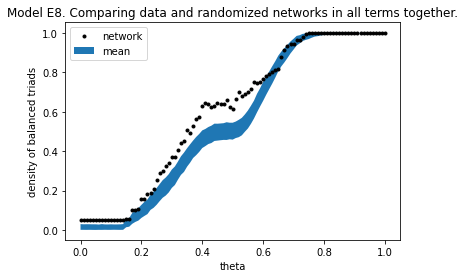

In [57]:
mean_vals = np.mean(np.array(test_E8_all_agents_terms_together_bal_dens_rands).T,1)
std_vals = np.std(np.array(test_E8_all_agents_terms_together_bal_dens_rands).T,1)

plt.plot(test_E8_all_agents_terms_together_thetas, test_E8_all_agents_terms_together_bal_dens, 'k.')

plt.fill_between(test_E8_all_agents_terms_together_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

Text(0, 0.5, 'density of balanced triads in all sems')

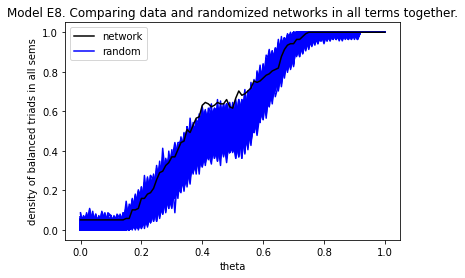

In [58]:
handles_rand = plt.plot(test_E8_all_agents_terms_together_thetas, np.array(test_E8_all_agents_terms_together_bal_dens_rands).T, 'b')
handles_net, = plt.plot(test_E8_all_agents_terms_together_thetas, test_E8_all_agents_terms_together_bal_dens, 'k')
# plt.legend(["network", "random"], handles = [handles_net, handles_rand[0]])
plt.legend([handles_net, handles_rand[0]], ["network", "random"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads in all sems")

In [58]:
first_sem = 2
last_sem = 6
thetas = np.linspace(0,1,101)
M = 1000

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len)

agents_len = [len(dcor_attributes[semm]) for semm in range(1,last_sem+1)]

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
attr_rands_M = [randomize_attribute_sets(dcor_attributes) for i in range(0,M)] 

rhos = np.zeros([last_sem - first_sem + 1, len(thetas)])

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(dcor_attributes[semm], theta)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        N = polarities.shape[0]
        rhos[semm-first_sem, i] = np.sum(polarities == 1)/2 / N/(N-1)*2

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        N = agents_len[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = distribute_random_polarities(N, rhos[semm - first_sem, i])
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

test_E8_all_agents_terms_together_thetas2 = thetas
test_E8_all_agents_terms_together_bal_dens2 = bal_dens
test_E8_all_agents_terms_together_bal_dens_rands2 = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(5799.0,
 array([5188., 5211., 5162., 5171., 5119., 5197., 5141., 5182., 5209.,
        5182., 5205., 5213., 5246., 5227., 5169., 5231., 5216., 5259.,
        5191., 5220., 5228., 5169., 5202., 5157., 5181., 5181., 5149.,
        5174., 5198., 5187., 5160., 5146., 5150., 5186., 5186., 5175.,
        5210., 5194., 5194., 5222., 5098., 5191., 5163., 5198., 5181.,
        5206., 5220., 5224., 5253., 5249., 5170., 5214., 5194., 5150.,
        5195., 5220., 5153., 5138., 5174., 5115., 5272., 5157., 5129.,
        5236., 5153., 5232., 5141., 5161., 5161., 5140., 5254., 5118.,
        5230., 5148., 5197., 5218., 5208., 5178., 5211., 5156., 5198.,
        5195., 5206., 5122., 5207., 5160., 5234., 5192., 5229., 5158.,
        5144., 5141., 5245., 5239., 5110., 5169., 5204., 5208., 5192.,
        5162., 5187., 5213., 5092., 5216., 5177., 5257., 5181., 5173.,
        5185., 5188., 5134., 5174., 5178., 5159., 5229., 5205., 5151.,
        5216., 5181., 5188., 5182., 5220., 5187., 5231., 5184., 5200

In [59]:
np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(1000, 1000)

In [60]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] >= bal_dens[i])

pvals_T

array([  44.,   51.,   43.,   33.,   51.,   40.,   42.,   39.,   38.,
         40.,   48.,   34.,   41.,   39.,   56.,  153.,  239.,   51.,
        106.,  140.,   15.,   32.,    9.,   27.,   18.,    8.,    1.,
          2.,    7.,    5.,    2.,    9.,   12.,    1.,    0.,    0.,
          0.,    1.,    0.,    1.,    0.,    1.,    0.,    1.,    1.,
          7.,    7.,    7.,    2.,   31.,   11.,    0.,    1.,    2.,
          7.,   13.,   22.,    8.,   51.,   79.,  197.,  370.,  708.,
        815.,  895.,  977.,  733.,  546.,  405.,  458.,  706.,  431.,
        537.,  274.,  379.,  408.,  561.,  689.,  732.,  819.,  802.,
        859.,  907.,  899.,  940.,  956.,  974.,  966.,  963.,  982.,
        983., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000.])

Text(0, 0.5, 'density of balanced triads')

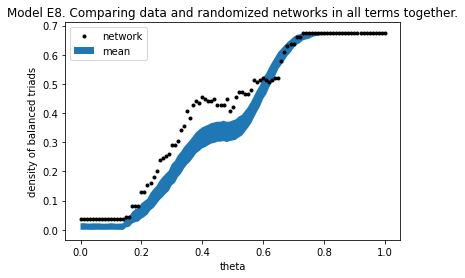

In [61]:
mean_vals = np.mean(np.array(test_E8_all_agents_terms_together_bal_dens_rands2).T,1)
std_vals = np.std(np.array(test_E8_all_agents_terms_together_bal_dens_rands2).T,1)

plt.plot(test_E8_all_agents_terms_together_thetas2, test_E8_all_agents_terms_together_bal_dens2, 'k.')

plt.fill_between(test_E8_all_agents_terms_together_thetas2, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")